# Model Engineering

In [1]:
# Import all relevant libraries
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('logger')

logger.info("Starting code...")
logger.debug("Importing libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
import sklearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, HuberRegressor, RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Set default plotting style and set all parematers as standard ready to publish plots
def set_plotting_style():
    # Set the default style
    sns.set_style("darkgrid")

    # Set the default context with font scale
    sns.set_context("paper",
                    font_scale=1.3, rc={"lines.linewidth": 1.0})

    # Set the default color palette
    sns.set_palette("plasma")

    # Set the default figure size
    plt.rcParams['figure.figsize'] = [8, 6]

# Call the function to set the default plotting style
set_plotting_style()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

logger.info("Libraries imported...")
logger.debug("Libraries imported...")

INFO:logger:Starting code...
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:logger:Libraries imported...


During the Machine Learning Modeling Stage, there are several key questions that should be answered:

1. **What is the problem type?** Is it a regression, classification, clustering, or another type of problem? This will determine the types of models that can be used.

2. **What is the target variable?** This is the variable that the model will be trained to predict.

3. **What are the features?** These are the variables that the model will use to make its predictions.

4. **What is the evaluation metric?** This is the metric that will be used to measure the performance of the model. It could be accuracy, precision, recall, F1 score, ROC AUC for classification problems, or mean absolute error, mean squared error, R-squared for regression problems.

5. **What is the validation strategy?** This could be a simple train/test split, K-fold cross-validation, or time-based validation, etc.

6. **Which machine learning models will be used?** Based on the problem type, various models like linear regression, logistic regression, decision trees, random forest, SVM, KNN, neural networks, etc., can be used.

7. **How will the model be tuned?** This involves selecting the hyperparameters for the model, which can be done through methods like grid search or random search.

8. **How will the model's performance be improved?** This could involve feature engineering, feature selection, using more complex models, ensemble methods, etc.

9. **How will the model be deployed?** This involves deciding how the model will be used in production.

10. **How will the model be maintained?** This involves monitoring the model's performance over time and retraining it if necessary.

In [2]:
import os

# Check if the file exists
if os.path.exists(r'C:/Users/HP/Desktop/Med_Cost_Prediction/Data/For_Modeling/processed_data.csv'):
    # Import the clean dataset    
    processed_medcost_df = pd.read_csv('C:/Users/HP/Desktop/Med_Cost_Prediction/Data/For_Modeling/processed_data.csv')
    print("File found!")
else:
    print("File not found!")
    
# Display first few rows of the dataset
processed_medcost_df.head()

File found!


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [11]:
# Features
X = processed_medcost_df.drop('charges', axis=1)

# Create the target variable
y = processed_medcost_df['charges']

# Segment the 'charges' column into 10 bins
bin_numbers = pd.qcut(y, 
                      q=10, 
                      labels=False, 
                      duplicates='drop')

# Split the data into temporary and testing sets (90%-10% split)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, 
                                                  test_size=0.1, 
                                                  stratify=bin_numbers, 
                                                  shuffle=True, 
                                                  random_state=123)

# Segment the y_test column into 10 bins 
bin_numbers = pd.qcut(y_temp, 
                      q=10, 
                      labels=False, 
                      duplicates='drop')

# Split the remaining data into training and validation sets (90%-10% split)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, 
                                                      test_size=0.1, 
                                                      stratify=bin_numbers, 
                                                      shuffle=True, 
                                                      random_state=123)

# Print the shape of the data
print("Shape of the training data: ", X_train.shape)
print("Shape of the validation data: ", X_valid.shape)
print("Shape of the test data: ", X_test.shape)

Shape of the training data:  (1082, 8)
Shape of the validation data:  (121, 8)
Shape of the test data:  (134, 8)


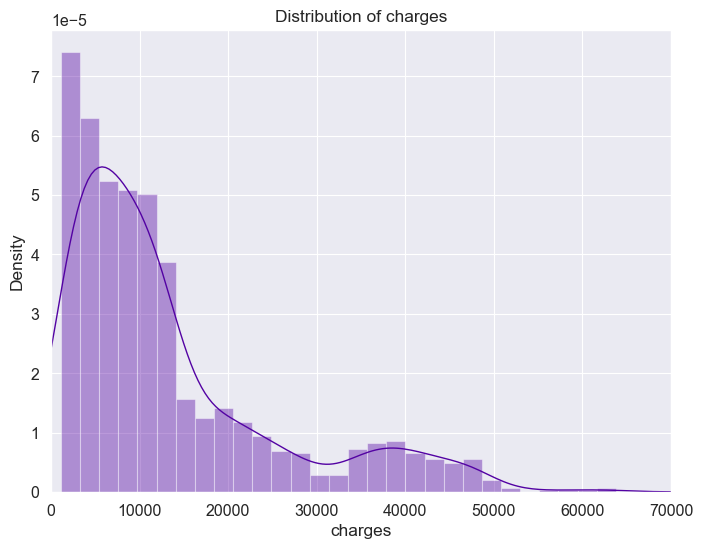

In [16]:
# Plot the distributions for y, y_train, y_test, y_valid using seaborn
sns.distplot(y, hist=True, label='y')

# Set the limit for the xaxis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of charges")

# Show the plot
plt.show()


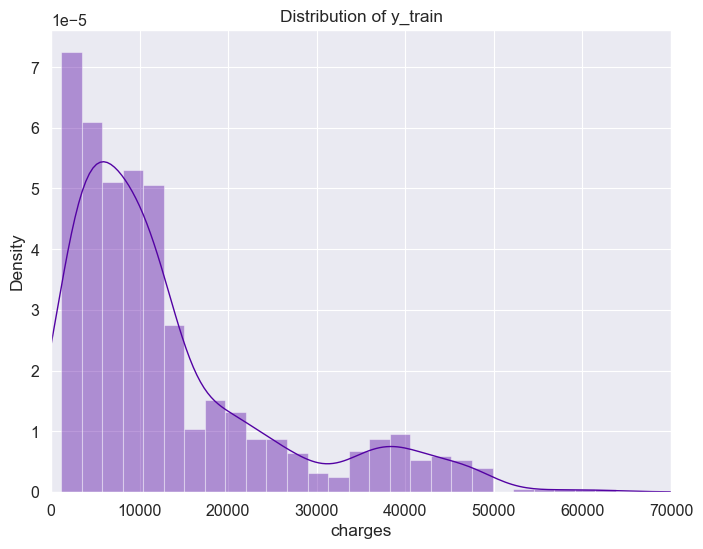

In [17]:
# Plot the distribution of charges in the train set
sns.distplot(y_train, hist=True, label='y_train')

# Set the limit for the x-axis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of Charges in the training set")

# Show the plot
plt.show()


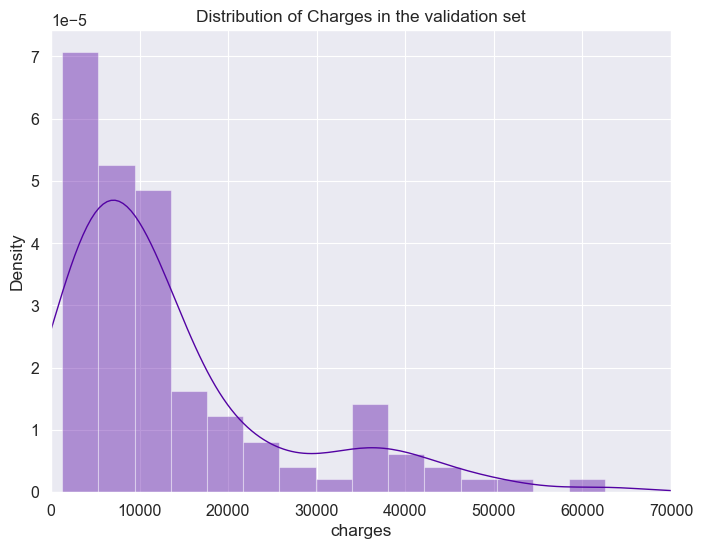

In [18]:
# Plot the distribution of charges in the validation set
sns.distplot(y_valid, hist=True, label='y_valid')

# Set the limit for the x-axis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of Charges in the validation set")

# Show the plot
plt.show()

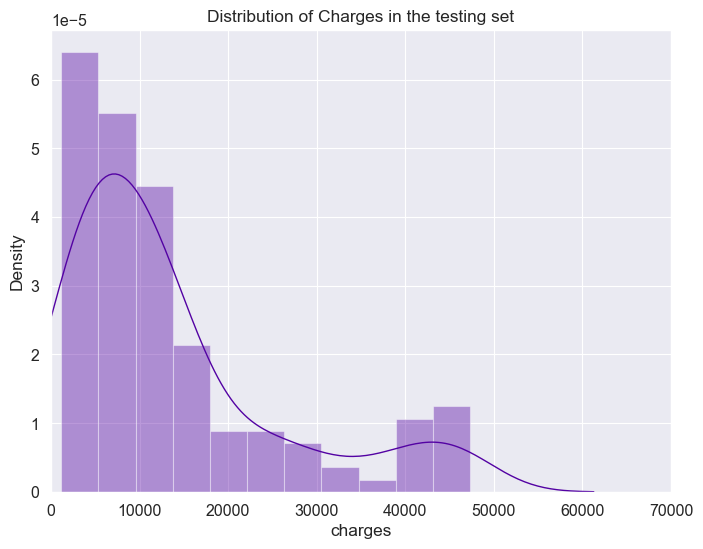

In [19]:
# Plot the distribution of charges in the test set
sns.distplot(y_test, hist=True, label='y_test')

# Set the limit for the x-axis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of Charges in the testing set")

# Show the plot
plt.show()